In [46]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [47]:
books = pd.read_csv("./data/books.csv")
books.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0


In [32]:
books.nunique()

isbn13            6810
isbn10            6810
title             6398
subtitle          2009
authors           3780
categories         567
thumbnail         6481
description       6474
published_year      94
average_rating     200
num_pages          915
ratings_count     3881
dtype: int64

In [33]:
books.isna().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

<Axes: >

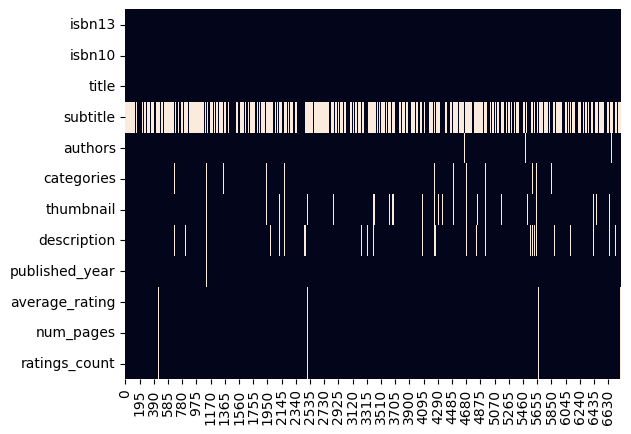

In [44]:
sns.heatmap(books.isna().transpose(), cbar=False)

<Axes: >

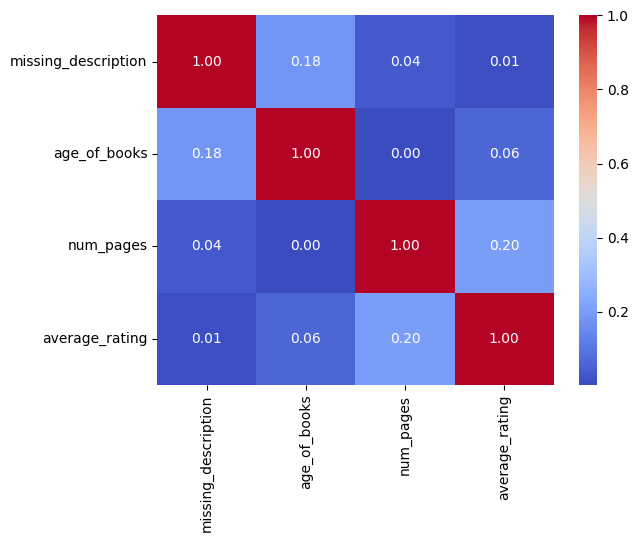

In [59]:
books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_books"] = 2024 - books["published_year"]
correlation_columns = ["missing_description", "age_of_books", "num_pages", "average_rating"]
corr_matrix = books[correlation_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

In [70]:
book_missing = books[~(books['description'].isna()) & 
    ~(books['num_pages'].isna()) & 
    ~(books['average_rating'].isna()) & 
    ~(books['age_of_books'].isna())
]
book_missing.isna().sum()

isbn13                    0
isbn10                    0
title                     0
subtitle               4226
authors                  63
categories               33
thumbnail               214
description               0
published_year            0
average_rating            0
num_pages                 0
ratings_count             0
missing_description       0
age_of_books              0
dtype: int64

In [76]:
book_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False).head(20)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
5,Philosophy,154
6,Comics & Graphic Novels,152
7,Religion,136
8,Drama,126
9,Juvenile Nonfiction,114


In [77]:
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

C:\Users\kavin\AppData\Local\Temp\ipykernel_18200\4057087481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["description"].str.split().str.len()


In [85]:
book_missing.loc[book_missing["words_in_description"].between(1, 4), ["description", "words_in_description"]]

,description,words_in_description
6,Donation.,1
11,Fantasy-roman.,1
748,Includes bibliographical references.,3
770,Bound For Oregon (PB),4
775,No Marketing Blurb,3
812,No Marketing Blurb,3
857,First published in 1813.,4
944,Edited by Maurice Hindle.,4
953,DEFOE/ROBINSON CRUSOE (BC),3
954,Edited by John Carey.,4


In [90]:
book_missing.loc[book_missing["words_in_description"].between(5, 14), ["description", "words_in_description"]]

,description,words_in_description
2,Volume Two of Stephen Donaldson's acclaimed se...,14
38,Koko is Peter Straub's foray into the psycholo...,13
70,A matter of life and death - and the Throne of...,12
77,Nonsense rhyming story. 4 yrs+,5
84,A study guide for the novel There's a Boy in t...,13
...,...,...
6715,The first comprehensive guide to addressing Na...,12
6726,Presents two complete novels from Henry James.,7
6757,Audio Book- unabriged on CD,5
6776,Raymond Chandler meets The Exorcist. Classic n...,12


In [91]:
book_missing.loc[book_missing["words_in_description"].between(15, 24), ["description", "words_in_description"]]

,description,words_in_description
10,One of Sidney Sheldon's most popular and bests...,18
32,Tells the story of three generations of Chines...,16
36,A magical and fantastic collection of early st...,24
57,A young drifter finds more than he bargained f...,21
68,A new 'The Doors of Perception' for the 21st c...,23
...,...,...
6767,Everything from the fingerprints of the gods t...,15
6782,Displays one of America's leading physicist's ...,21
6783,Basics Illustration 01: Thinking Visually expl...,17
6789,Provides an introduction to the American artis...,23


In [92]:
book_missing.loc[book_missing["words_in_description"].between(25, 35), ["description", "words_in_description"]]

,description,words_in_description
9,Kate Blackwell is an enigma and one of the mos...,30
14,"Available in the U.S. for the first time, this...",29
20,"It is 1937, and Charles Ashworth, a Canon to t...",33
21,Reissue of the author's most famous and well-l...,30
46,No one believes a little girl when she insists...,30
...,...,...
6760,"Joel, an English teacher, has never really lik...",28
6766,Discusses the historical and intellectual back...,26
6775,Presents nearly one thousand recipes--from app...,31
6779,Edited by the creator and executive producer o...,30


In [88]:
book_missing_shrot_discription = book_missing[book_missing["words_in_description"] >= 25]

In [89]:
book_missing_shrot_discription.shape

(5197, 15)

In [94]:
book_missing_shrot_discription["title_and_subtitle"] = (
    np.where(book_missing_shrot_discription["subtitle"].isna(), book_missing_shrot_discription["title"],
             book_missing_shrot_discription[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

C:\Users\kavin\AppData\Local\Temp\ipykernel_18200\1850809064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_shrot_discription["title_and_subtitle"] = (


In [95]:
book_missing_shrot_discription

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


In [97]:
book_missing_shrot_discription["tagged_description"] = book_missing_shrot_discription[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

C:\Users\kavin\AppData\Local\Temp\ipykernel_18200\3148069844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_shrot_discription["tagged_description"] = book_missing_shrot_discription[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


In [98]:
(
    book_missing_shrot_discription
    .drop(['missing_description', 'age_of_books', 'words_in_description', 'subtitle', 'title'], axis=1)
    .to_csv("cleaned_books.csv", index=False)
)